In [1]:
import pandas as pd 
import matplotlib.pyplot as plt     
data = pd.read_csv('all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [3]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [4]:
data.shape

(186850, 6)

### CLEAN UP DATA!

### Drop Rows Of Nan
first thing all we have gonna do is find the missing values, and then drop the data.

In [5]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
print('Total Missing values : ')
data.isnull().sum().sum()

Total Missing values : 


3270

In [7]:
data = data.dropna(how='all')
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Change Type Data to the right type

In [8]:
data = data[data['Order Date'].str[0:2]!='Or']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Order ID'] = pd.to_numeric(data['Order ID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.9+ MB


### Add month column

In [11]:
data['month'] = data['Order Date'].str[0:2]
data['month'] = pd.to_numeric(data['month'])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add City Column

In [14]:
def get_city(address):
  return address.split(",")[1].strip(" ")

def get_state(address):
  return address.split(",")[2].split(" ")[1]

data['city'] = data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})" )
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [15]:
data['Order Date'] = data['Order Date'].apply(lambda x : x.replace('/','-'))
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_2796\903676753.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### DATA EXPLORATION!


#### Question 1: What was the best month for sales? How much was earned that month? 

In [16]:
data['GMV'] = data['Quantity Ordered'] * data['Price Each'].astype('float')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,GMV
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [17]:
gmv_month = data.groupby('month')['Quantity Ordered'].sum().reset_index()
print(gmv_month)

    month  Quantity Ordered
0       1             10903
1       2             13449
2       3             17005
3       4             20558
4       5             18667
5       6             15253
6       7             16072
7       8             13448
8       9             13109
9      10             22703
10     11             19798
11     12             28114


In [18]:
months = range(1,13)

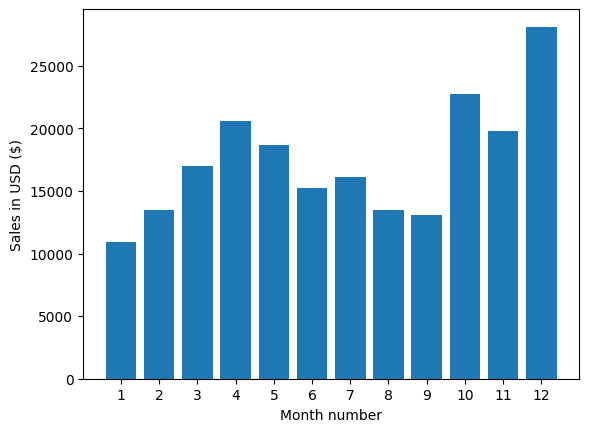

In [19]:
plt.bar(gmv_month['month'],gmv_month['Quantity Ordered'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?


In [20]:
gmv_city = data.groupby('city')['Quantity Ordered'].sum().reset_index()
print(gmv_city)

                 city  Quantity Ordered
0        Atlanta (GA)             16602
1         Austin (TX)             11153
2         Boston (MA)             22528
3         Dallas (TX)             16730
4    Los Angeles (CA)             33289
5  New York City (NY)             27932
6       Portland (ME)              2750
7       Portland (OR)             11303
8  San Francisco (CA)             50239
9        Seattle (WA)             16553


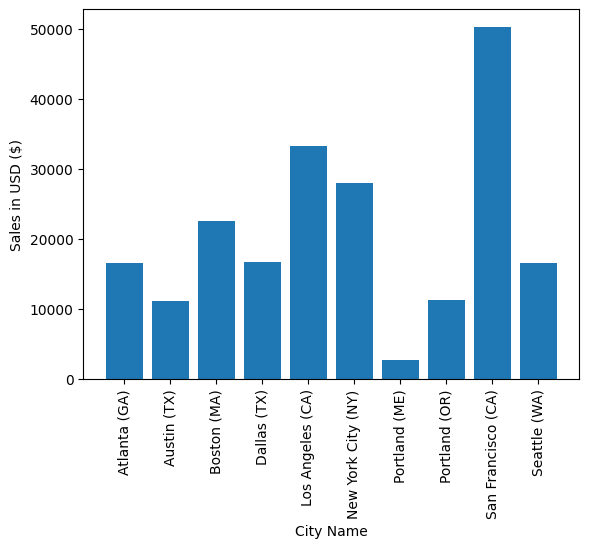

In [21]:
plt.bar(gmv_city['city'],gmv_city['Quantity Ordered'])
plt.xticks(rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


separate hour&minute to new column

In [22]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,GMV,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


In [23]:
gmv_hour = data.groupby('Hour').count()
print(gmv_hour)

      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411    12411             12411       12411       12411   
12       12587    12587           

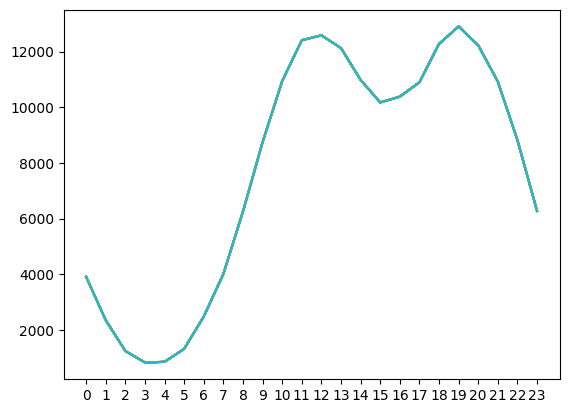

In [24]:
plt.plot(gmv_hour)
plt.xticks(data['Hour'].unique())
plt.show()

#### Question 4: What products are most often sold together?


In [34]:
df =  data[data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_2796\2534085609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,GMV,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [35]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5 :  What product sold the most? 


In [26]:
gmv_product = data.groupby('Product')['Quantity Ordered'].sum().reset_index()
print(gmv_product)

                       Product  Quantity Ordered
0                 20in Monitor              4129
1       27in 4K Gaming Monitor              6244
2             27in FHD Monitor              7550
3       34in Ultrawide Monitor              6199
4        AA Batteries (4-pack)             27635
5       AAA Batteries (4-pack)             31017
6     Apple Airpods Headphones             15661
7   Bose SoundSport Headphones             13457
8                Flatscreen TV              4819
9                 Google Phone              5532
10                    LG Dryer               646
11          LG Washing Machine               666
12    Lightning Charging Cable             23217
13          Macbook Pro Laptop              4728
14             ThinkPad Laptop              4130
15        USB-C Charging Cable             23975
16             Vareebadd Phone              2068
17            Wired Headphones             20557
18                      iPhone              6849


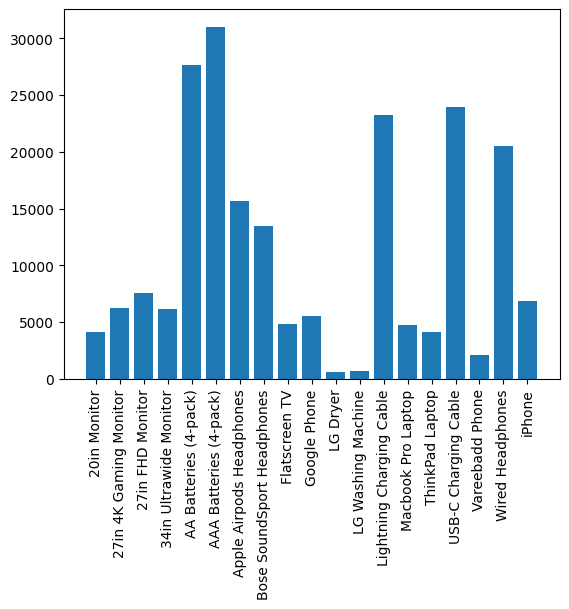

In [27]:
plt.bar(gmv_product['Product'],gmv_product['Quantity Ordered'])
plt.xticks(rotation = 'vertical')
plt.show()